<a href="https://colab.research.google.com/github/AnjaliKrishna123/Project/blob/main/Diabetes_patient_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install pandas
import pandas as pd
#pip install numpy
import numpy as np
#pip install matplotlib
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns
#pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
	
#reading the file
data=pd.read_csv("diabetes.csv")

In [ ]:
#checking the number of rows and columns in the file
data.shape

(768, 9)

In [ ]:
#checking for null values in the data
data.isnull().values.any()

False

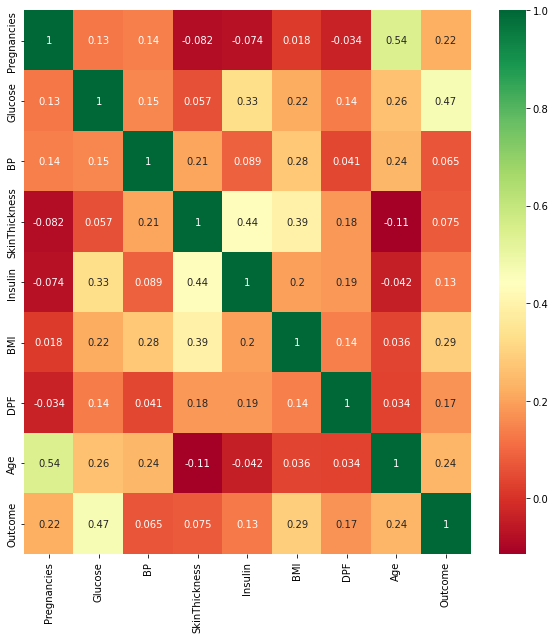

In [ ]:
#renaming big coloums name
data.rename(columns={'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP'},inplace=True)
data.head(5)

data.describe()

corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#plotting correlation graph
data.corr()

print("Number of zeros in Glocose : ",data[data["Glucose"]==0].shape[0])
print("Number of zeros in Blood Pressure : ",data[data["BP"]==0].shape[0])
print("Number of zeros in Skin Thickness : ",data[data["SkinThickness"]==0].shape[0])
print("Number of zeros in Insulin : ",data[data["Insulin"]==0].shape[0])
print("Number of zeros in BMI : ",data[data["BMI"]==0].shape[0])
print("Number of zeros in Diabetes Pedigree Function : ",data[data["DPF"]==0].shape[0])
print("Number of zeros in Age : ",data[data["Age"]==0].shape[0])

data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["BP"]=data["BP"].replace(0,data["BP"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["DPF"]=data["DPF"].replace(0,data["DPF"].mean())
data["Age"]=data["Age"].replace(0,data["Age"].mean())



Number of zeros in Glocose :  0
Number of zeros in Blood Pressure :  0
Number of zeros in Skin Thickness :  0
Number of zeros in Insulin :  0
Number of zeros in BMI :  0
Number of zeros in Diabetes Pedigree Function :  0
Number of zeros in Age :  0


In [ ]:

#cleaning the data
print("Number of zeros in Glocose : ",data[data["Glucose"]==0].shape[0])
print("Number of zeros in Blood Pressure : ",data[data["BP"]==0].shape[0])
print("Number of zeros in Skin Thickness : ",data[data["SkinThickness"]==0].shape[0])
print("Number of zeros in Insulin : ",data[data["Insulin"]==0].shape[0])
print("Number of zeros in BMI : ",data[data["BMI"]==0].shape[0])
print("Number of zeros in Diabetes Prediction Factor : ",data[data["DPF"]==0].shape[0])
print("Number of zeros in Age : ",data[data["Age"]==0].shape[0])

Number of zeros in Glocose :  0
Number of zeros in Blood Pressure :  0
Number of zeros in Skin Thickness :  0
Number of zeros in Insulin :  0
Number of zeros in BMI :  0
Number of zeros in Diabetes Prediction Factor :  0
Number of zeros in Age :  0


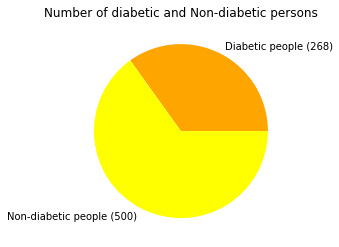

In [ ]:
#counting the total individual Outcomes
positive_outcome=len(data.loc[data["Outcome"]==1])
negative_outcome=len(data.loc[data["Outcome"]==0])
(positive_outcome,negative_outcome)

y=np.array([positive_outcome,negative_outcome])
mylabels=["Diabetic people (268)","Non-diabetic people (500)"]
plt.pie(y,labels=mylabels,colors=["orange","yellow"])
plt.title("Number of diabetic and Non-diabetic persons")
plt.show()


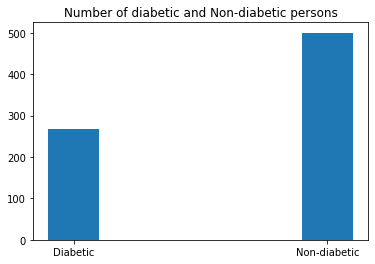

In [ ]:

df={'Diabetic':positive_outcome,'Non-diabetic':negative_outcome}
A=list(df.keys())
B=list(df.values())
plt.bar(A,B,width=0.2)
plt.title("Number of diabetic and Non-diabetic persons")
plt.show()

In [ ]:
X=data.drop(columns=["Outcome"])
Y=data["Outcome"]
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.30,random_state=10)

In [ ]:
model=RandomForestClassifier(random_state=10)
model.fit(X_train,Y_train.ravel())
pred=model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
acc=metrics.accuracy_score(Y_test,pred)
print("\n\n ACCURACY OF THE MODEL : ",acc)
print("\n")
def prediction_calculator(n):
    for i in range(n):
        print("\nENTER THE DETAILS FOR PERSON : ",(i+1))
        Gender_ip=input("\nGENDER M/F/m/f: ")
        if(Gender_ip=="M" or Gender_ip=="m"):
            Preg_ip=0
        else:
            Preg_ip=input("Number of Pregnancies : ")
        Age_ip=input("Age : ")
        Bmi_ip=input("BMI : ")
        Glucose_ip=input("Glucose level : ")
        Insulin_ip=input("Insulin level : ")
        Bp_ip=input("BP level : ")
        St_ip=input("Skin Thickness : ")
        Dpf_ip=input("Diabetes pedigree function : ")



 ACCURACY OF THE MODEL :  0.750465549348231


